In [3]:
import warnings
warnings.filterwarnings('ignore')
import math
import random
import numpy as np
import pandas as pd
from scipy.special import gamma
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import itertools
from matplotlib import pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch import optim
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [4]:
def errors(x,y,X_test, Y_test):
    
    clf = LinearRegression()
    clf.fit(x, y)
    y_pred= clf.predict(X_test)
    Y_test.shape = (test_size,)
    y_pred.shape = (test_size,)
    k = np.abs(y_pred-Y_test)
    K = k[k<1]
    sort = np.argsort(Y_test[k<1])
    
    plt.subplot(2, 2, 1)
    plt.plot(range(len(K)),K,'.',range(len(K)),np.sort(K))
    plt.subplot(2, 2, 2)
    plt.plot(range(len(K)),y_pred[k<1][sort],'^', range(len(K)), Y_test[k<1][sort],'v')
    
    print('Error: ',np.mean(K),test_size-len(K))
    
    model = Sequential()
    model.add(Dense(1000, input_shape=(x.shape[1],), activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

    es = EarlyStopping(monitor='val_loss',
                       mode='min',
                       patience=4000,
                       restore_best_weights = True)

    history = model.fit(x, y,
                        validation_data = (X_test, Y_test),
                        callbacks=[es],
                        epochs=100,
                        batch_size=50,
                        verbose=0)

    y_pred = model.predict(X_test)
    Y_test.shape = (test_size,)
    y_pred.shape = (test_size,)
    k = np.abs(y_pred-Y_test)
    K = k[k<1]
    sort = np.argsort(Y_test[k<1])
    
    print('Error: ',np.mean(K),test_size-len(K))
    
    plt.subplot(2, 2, 3)
    plt.plot(range(len(K)),K,'.',range(len(K)),np.sort(K))
    plt.subplot(2, 2, 4)
    plt.plot(range(len(K)),y_pred[k<1][sort],'^', range(len(K)), Y_test[k<1][sort],'v')
    
    plt.show()    

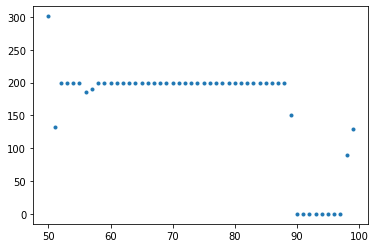

8178


In [17]:
x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
y = np.array(y)
accs = np.zeros(50)
for i in range(len(y)):
    k = int((y[i]-0.5)*100)
    accs[k] += 1
plt.plot(range(50,100),accs, '.')
plt.show()
print(len(y))

# Addition Transformation

Error:  0.6914442 0
32/32 [==============================] - 0s 2ms/step
Error:  0.10396390321388245 0


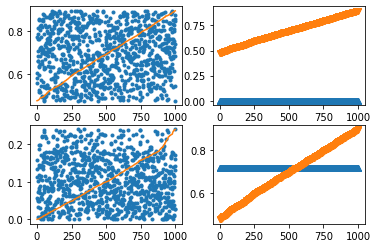

In [18]:
x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
x = torch.sum(x, axis = 1)
train_size = 7000
x = np.array(x[:train_size])
y = np.array(y[:train_size])

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
X_test = torch.sum(X_test, axis = 1)
test_size = 1000
X_test = np.array(X_test[train_size:train_size+test_size])
Y_test = np.array(Y_test[train_size:train_size+test_size])

y.shape = (y.shape[0],1)
Y_test.shape = (Y_test.shape[0],1)
    
errors(x,y,X_test, Y_test)


# Space-filling Z-curve

(7000, 2500) (7000,)
Error:  0.6914442 0
32/32 [==============================] - 0s 2ms/step
Error:  0.10287441836242675 0


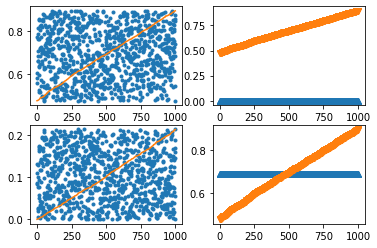

In [20]:
import zCurve as z 

def order(x, precision=10):
    m,n,_ = x.shape
    b = (np.copy(x)*precision).astype(int)
    c = np.zeros((m,n)).astype(int)
    for i in range(m):
        for j in range(n):
            c[i][j] += z.interlace(int(b[i][j][0]),int(b[i][j][1]))
    sort = np.argsort(c)
    d = np.zeros(x.shape)
    for i in range(m):
        for j in range(n):
            d[i][j] += x[i][sort[i][j]]
    return d

x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
train_size = 7000
x = order(np.array(x[:train_size]))
y = np.array(y[:train_size])

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
test_size = 1000
X_test = order(np.array(X_test[train_size:train_size+test_size]))
Y_test = np.array(Y_test[train_size:train_size+test_size])

x.shape = (train_size, x.shape[1]*x.shape[2])
X_test.shape = (test_size, X_test.shape[1]*X_test.shape[2])

print(x.shape, y.shape)
errors(x,y,X_test, Y_test)

# Pyramid ordering (max)

Error:  nan 1000
32/32 [==============================] - 0s 2ms/step
Error:  0.10282966690368653 0


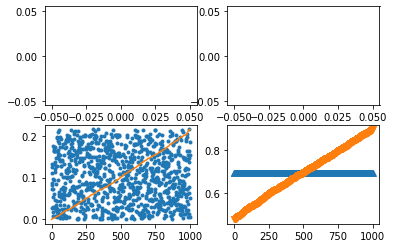

In [21]:
def order(x):
    m,n,_ = x.shape
    c = np.max(np.copy(x), axis = 2)
    sort = np.argsort(c)
    d = np.zeros(x.shape)
    for i in range(m):
        for j in range(n):
            d[i][j] += x[i][sort[i][j]]
    return d

x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
train_size = 7000
x = order(np.array(x[:train_size]))
y = np.array(y[:train_size])

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
test_size = 1000
X_test = order(np.array(X_test[train_size:train_size+test_size]))
Y_test = np.array(Y_test[train_size:train_size+test_size])

x.shape = (train_size, x.shape[1]*x.shape[2])
X_test.shape = (test_size, X_test.shape[1]*X_test.shape[2])

errors(x,y,X_test, Y_test)

# Pyramic Ordering (min)

Error:  nan 1000
32/32 [==============================] - 0s 3ms/step
Error:  0.10323366294555665 0


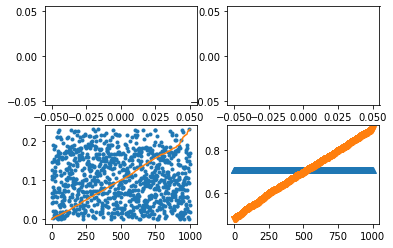

In [22]:
def order(x):
    m,n,_ = x.shape
    c = np.min(np.copy(x), axis = 2)
    sort = np.argsort(c)
    d = np.zeros(x.shape)
    for i in range(m):
        for j in range(n):
            d[i][j] += x[i][sort[i][j]]
    return d

x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
train_size = 7000
x = order(np.array(x[:train_size]))
y = np.array(y[:train_size])

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
test_size = 1000
X_test = order(np.array(X_test[train_size:train_size+test_size]))
Y_test = np.array(Y_test[train_size:train_size+test_size])

x.shape = (train_size, x.shape[1]*x.shape[2])
X_test.shape = (test_size, X_test.shape[1]*X_test.shape[2])

errors(x,y,X_test, Y_test)

# Sum pooling

(7000, 25) (7000,)
Error:  0.6914442 0
32/32 [==============================] - 0s 2ms/step
Error:  0.10315101070671082 0


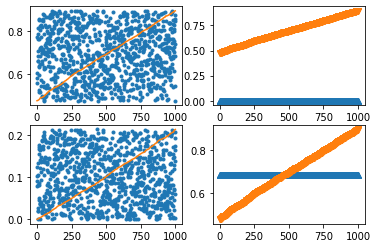

In [27]:
x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
x = torch.sum(x.transpose(1,2).resize(len(y),25,100), 2).resize(len(y),25)
train_size = 7000
x = np.array(x[:train_size])
y = np.array(y[:train_size])
print(x.shape, y.shape)

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
X_test = torch.sum(X_test.transpose(1,2).resize(len(Y_test),25,100), 2).resize(len(Y_test),25)
test_size = 1000
X_test = np.array(X_test[train_size:train_size+test_size])
Y_test = np.array(Y_test[train_size:train_size+test_size])

y.shape = (7000,1)
Y_test.shape = (1000,1)


    
errors(x,y,X_test, Y_test)

# Order and sum pooling

Error:  nan 1000
32/32 [==============================] - 0s 2ms/step
Error:  0.1029035044740677 0


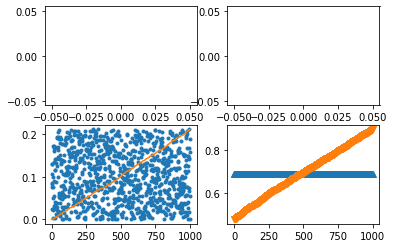

In [28]:
def order(x):
    m,n,_ = x.shape
    c = np.max(np.copy(x), axis = 2)
    sort = np.argsort(c)
    d = np.zeros(x.shape)
    for i in range(m):
        for j in range(n):
            d[i][j] += x[i][sort[i][j]]
    return d

x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
train_size = 7000
x = order(np.array(x[:train_size]))
x = torch.tensor(x).resize(7000,500,5)
x = torch.sum(x.transpose(1,2).resize(7000,25,100), 2)
x = np.array(x)
y = np.array(y[:train_size])



X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
test_size = 1000
X_test = order(np.array(X_test[train_size:train_size+test_size]))
X_test = torch.tensor(X_test).resize(1000,500,5)
X_test = torch.sum(X_test.transpose(1,2).resize(1000,25,100), 2)
X_test= np.array(X_test)
Y_test = np.array(Y_test[train_size:train_size+test_size])

y.shape = (y.shape[0],1)
Y_test.shape = (Y_test.shape[0],1)


errors(x,y,X_test, Y_test)

# Mapping to Covariance Matrix

Error:  0.6914442 0
32/32 [==============================] - 0s 1ms/step
Error:  0.10292181904296875 0


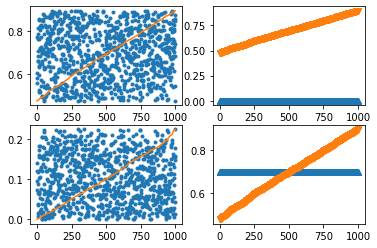

In [29]:
x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
train_size = 7000
x = np.array(x[:train_size])
y = np.array(y[:train_size])

X = []
for i in range(len(x)):
    X.append(np.cov(x[i].transpose()))

x = np.copy(X)

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
test_size = 1000
X_test = np.array(X_test[train_size:train_size+test_size])
Y_test = np.array(Y_test[train_size:train_size+test_size])

X = []
for i in range(len(X_test)):
    X.append(np.cov(X_test[i].transpose()))

X_test = np.copy(X)

x.shape = (train_size, np.prod(x.shape)//train_size)
X_test.shape = (test_size, np.prod(X_test.shape)//test_size)
y.shape = (y.shape[0],1)
Y_test.shape = (Y_test.shape[0],1)

errors(x,y,X_test, Y_test)


# Baseline error

In [30]:
np.mean(np.abs(Y_test-np.mean(y)))

0.102827348